In [65]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

In [66]:
data = "cardio_train.csv"
cardio_df = pd.read_csv(data, delimiter = ';')
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [67]:
cardio1_df= cardio_df.drop(['id'],axis=1)
# cardio1_df.active[cardio1_df.active == 1] = "True"
# cardio1_df.active[cardio1_df.active == 0] = "False"
age_upd = cardio1_df['age'].div(365)
rounded_age = round(age_upd)
cardio1_df.update(rounded_age)
cardio1_df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [68]:
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1
15,46.0,2,172,112.0,120,80,1,1,0,0,0,1


In [116]:
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0


In [117]:
#Clean Cardio0 to remove outliers - negative and impossibly high BPs
cardio_0 = cardio_0[cardio_0['ap_lo'] >= 50]
cardio_0 = cardio_0[cardio_0['ap_lo'] < 200]
cardio_0.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0


In [118]:
#Clean Cardio1 to remove outliers - negative and impossibly high BPs
cardio_1 = cardio_1[cardio_1['ap_lo'] >= 50]
cardio_1 = cardio_1[cardio_1['ap_lo'] < 200]
cardio_1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1
15,46.0,2,172,112.0,120,80,1,1,0,0,0,1


In [119]:
#DBP ttest comparison for heart attack vs no heart attack
stats.ttest_ind(cardio_0['ap_lo'], cardio_1['ap_lo'], equal_var = False)

Ttest_indResult(statistic=-93.4076197256065, pvalue=0.0)

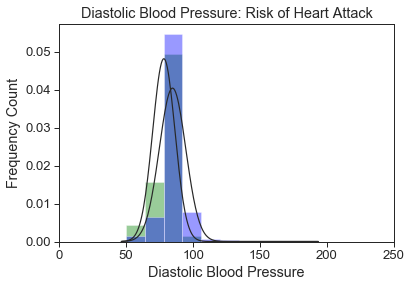

In [120]:
#Display the bell curve
cardio0_dbp = sns.distplot(cardio_0['ap_lo'], fit = norm, label = "DBP Heart ", color = "g", bins = 10, kde = False)
cardio1_dbp = sns.distplot(cardio_1['ap_lo'], fit = norm, label = "DBP Non Heart Attack", color = "b", bins = 10, kde = False)

#Change how it looks
sns.set_style("darkgrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("deep")
cardio0_dbp.set(xlabel='Diastolic Blood Pressure', ylabel='Frequency Count', title = "Diastolic Blood Pressure: Risk of Heart Attack")
cardio1_dbp.set(xlabel='Diastolic Blood Pressure', ylabel='Frequency Count', title = "Diastolic Blood Pressure: Risk of Heart Attack")

#Set x limits
cardio0_dbp.set(xlim = [0,250])
cardio1_dbp.set(xlim = [0,250])

#Save the figure
cardio0_dbp.figure.savefig("DBP.png")
cardio1_dbp.figure.savefig("DBP.png")

In [121]:
#Find 1,2,3 Category Totals

#Get sums of 3 categories for No Heart Attack
cat1_0 = cardio_0[cardio_0['gluc']==1].count()
print(cat1_0['gluc'])
cat2_0 = cardio_0[cardio_0['gluc']==2].count()
print(cat2_0['gluc'])
cat3_0 = cardio_0[cardio_0['gluc']==3].count()
print(cat3_0['gluc'])

#Get sums of 3 categories for Yes Heart Attack
cat1_1 = cardio_1[cardio_1['gluc']==1].count()
print(cat1_1['gluc'])
cat2_1 = cardio_1[cardio_1['gluc']==2].count()
print(cat2_1['gluc'])
cat3_1 = cardio_1[cardio_1['gluc']==3].count()
print(cat3_1['gluc'])

30734
2091
2003
27900
2994
3245


In [164]:
#Create Chi Square DF
cs_data = pd.Series([cat1_0['gluc'], cat2_0['gluc'], cat3_0['gluc']], index = ["Normal", "Above Normal", "Well Above Normal"])
cs_exp = pd.Series([cat1_1['gluc'], cat2_1['gluc'], cat3_1['gluc']], index = ["Normal", "Above Normal", "Well Above Normal"])

cs_df = pd.DataFrame(cs_data)
cs_df[1] = cs_exp
cs_df


,0,1
Normal,30734,27900
Above Normal,2091,2994
Well Above Normal,2003,3245


In [165]:
#Run Chi Square
stats.chisquare(cs_df[0], cs_df[1])

Power_divergenceResult(statistic=1035.5834959331103, pvalue=1.3362911220535194e-225)

In [168]:
#Clean up chi data frame
cs_df.columns = ["No Heart Attack Glucose", "Heart Attack Glucose"]
cs_df

,No Heart Attack Glucose,Heart Attack Glucose
Normal,30734,27900
Above Normal,2091,2994
Well Above Normal,2003,3245


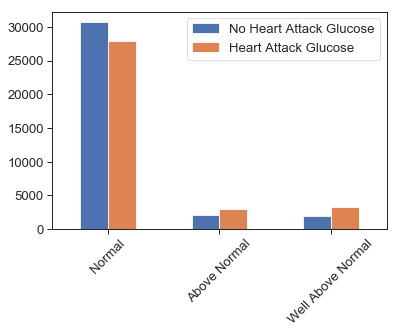

In [171]:
#Create bar graph for chi square for Glucose Levels
cardio_gluc = cs_df.plot.bar(rot=45)